In [1]:
# Import modules
import pandas as pd
from zipfile import ZipFile 
import gzip, collections, random
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# data_path = 'encode/20210418_hg19_8461ex'
data_path = 'encode/legacy'

In [2]:
# Unzip data
if os.path.isdir('extracted_bed'):
    print('Files present.')
else:
    for file_ in tqdm(os.listdir('data')):
        #path_to_file_to_be_extracted
        ip = 'data/'+file_
        #output file to be filled
        op = open("extracted_bed/"+file_.split('.')[0]+"1.bed","w")

        with gzip.open(ip,"rb") as ip_byte:
            op.write(ip_byte.read().decode("utf-8"))
            op.close()

Files present.


In [5]:
# Prepare metadata
metadata = pd.read_csv(data_path+'/metadata.tsv', sep='\t')
metadata_ = metadata[['File accession', 'Biosample term name', 'Biosample type', 'File assembly', 'Experiment target']]
metadata_ = metadata_[metadata_['Biosample type']=='cell line']
metadata_

,File accession,Biosample term name,Biosample type,File assembly,Experiment target
0,ENCFF766CJW,GM12878,cell line,hg19,NR2F1-human
1,ENCFF878DLA,GM12878,cell line,hg19,NR2F1-human
2,ENCFF241KMD,GM12878,cell line,hg19,NR2F1-human
3,ENCFF810CEL,GM12878,cell line,hg19,NR2F1-human
4,ENCFF255HIR,GM12878,cell line,hg19,NR2F1-human
...,...,...,...,...,...
8313,ENCFF532VDQ,H1,cell line,hg19,EP300-human
8314,ENCFF843SYD,H1,cell line,hg19,EP300-human
8315,ENCFF380YEP,H1,cell line,hg19,EP300-human
8316,ENCFF087TMV,H1,cell line,hg19,EP300-human


In [6]:
#
cellline_dict = collections.Counter(metadata_['Biosample term name'])
master_record = pd.DataFrame()
for line in tqdm(cellline_dict):
    #print(line, cellline_dict[i])
    df = metadata_[metadata_['Biosample term name']==line]
    tfs = collections.Counter(df['Experiment target'])
    for tf in tfs:
        df_ = df[df['Experiment target']==tf]
        #for acc_ in df_['File accession'].values:
        master_record = master_record.append(df_[df_['File accession']==random.choice(df_['File accession'].values)], ignore_index=True)
        #if acc_+'.bed' in os.listdir('extracted_bed'):
            #
            #break 
print(master_record.shape)

100%|██████████| 77/77 [00:01<00:00, 43.40it/s](1312, 5)



100%|██████████| 156/156 [01:01<00:00,  2.54it/s]
DescribeResult(nobs=156, minmax=(127.5861748723033, 2102.914861788618), mean=412.4333663476857, variance=77097.34694958171, skewness=3.2308040457084832, kurtosis=12.936581752971057)


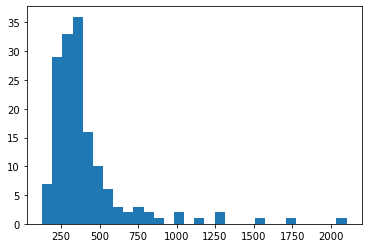

In [158]:
means=[]
for acc in tqdm(master_record['File accession'].values):
    try:
        data = pd.read_csv('extracted_bed/'+acc+'.bed', sep='\t', header=None)
        list_ = abs(data[1].values-data[2].values)
        means.append(np.mean(list_))
    except:
        print(acc)
plt.hist(means, bins=30)
print(stats.describe(means))

In [9]:
means = []
for file_ in tqdm(os.listdir('extracted_bed')):
    data = pd.read_csv('extracted_bed/'+file_, sep='\t', header=None)
    list_ = abs(data[1].values-data[2].values)
    #print(stats.describe(list_))
    means.append(np.mean(list_))
    #plt.hist(list_, bins=20)s

100%|██████████| 811/811 [05:08<00:00,  2.63it/s]


In [11]:
fig, ax = plt.subplots(1, figsize=(9,5))
ax.hist(means, bins=30)
ax.set_xlabel('Mean sequence length', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
ax.set_xticklabels(dates)
print(stats.describe(means))

NameError: name 'dates' is not defined

In [128]:
import datetime
start = datetime.datetime.strptime("28-03-2021", "%d-%m-%Y")
end = datetime.datetime.strptime("17-04-2021", "%d-%m-%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

times = [49, 78, 51, 75, 50, 57, 34, 20, 17, 23, 39, 15, 10, 0, 21, 39, 26, 33, 60, 19]
times_=list(reversed(times))
times_

dates = []
for date in date_generated:
    dates.append(date.strftime("%d-%m-%Y"))

X_Y_Spline = make_interp_spline(np.linspace(0,19,20), times_)
X_ = np.linspace(np.linspace(0,19,20).min(), np.linspace(0,19,20).max(), 500)
Y_ = X_Y_Spline(X_)

ipykernel_launcher:7: UserWarning: FixedFormatter should only be used together with FixedLocator
ipykernel_launcher:15: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.


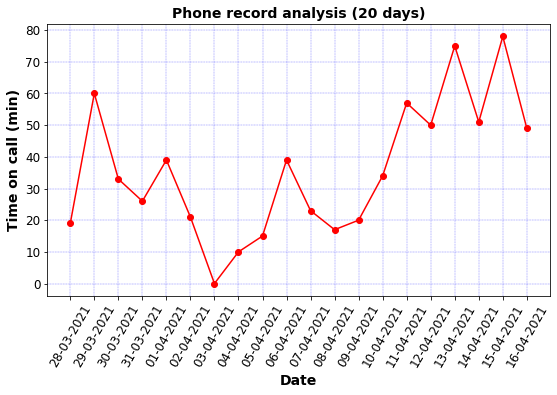

In [140]:
from scipy.interpolate import make_interp_spline

fig, ax = plt.subplots(1, figsize=(9,5))
ax.plot(dates, times_, marker='o', color='r')
ax.set_xlabel('Date', fontsize=14, fontweight='bold')
ax.set_ylabel('Time on call (min)', fontsize=14, fontweight='bold')
ax.set_xticklabels(dates)

# # # We change the fontsize of minor ticks label 
ax.tick_params(axis='x', which='major', labelsize=12, rotation=60)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.grid(color='b', ls = '-.', lw = 0.25)

ax.set_title('Phone record analysis (20 days)', fontsize=14, fontweight='bold')
plt.savefig('phonecall.jpg', dpi=600, transparent=False, optimize=True,bbox_inches='tight')